# Week2 One-way ANOVA-方差稳定化变换

## 背景描述

这里对五种绝缘材料的性能进行实验研究。我们在升高电压的情况下对每种材料的四个样本进行测试，以加速失效时间。
这是一个因子水平数 𝑎 = 5 和重复次数 𝑛 = 4 的单因子实验。
## 数据描述
| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）Material | 绝缘材料类型 | categorical variable | [1, 2, 3, 4, 5] |
| （因变量）Failure Time | 失效时间 | continuous variable（单位：分钟） | Real |

## 问题 
注：这里使用 \alpha=0.05 的显著性水平

1. 试判断 5 种绝缘材料的性能是否存在差异.
2. 试判断该实验残差是否具有异方差性.
3. 若实验中的残差具有异方差性，试判断失效时间如何进行方差稳定化变换.
5. 如果需要变换，基于变换后的数据，试判断 5 种绝缘材料的性能是否存在差异.


## 问题1 One-Way Anova检验

检验假设 $H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4$ ;  $H_1: \mu_1, \mu_2, \mu_3, \mu_4$不全相等

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
alpha = 0.05
a = 5
n = 4
x=pd.read_csv('/Users/chixinning/Library/Containers/com.tencent.xinWeChat/Data/Library/Application Support/com.tencent.xinWeChat/2.0b4.0.9/5a0cb8b11543bafd05fe7674a038bba5/Message/MessageTemp/e69d0897e1250353e4abb70b178f2b56/File/One-way ANOVA-方差稳定化变换/实验课课件/Project2.csv')

In [2]:
data=x.values[:,1:3]  #将data读到多维度列表
print(data.shape)

(20, 2)


In [3]:
#分组
#注意这里的python语法
group1 = data[data[:,0] == 1,1]
group2 = data[data[:,0] == 2,1]
group3 = data[data[:,0] == 3,1]
group4 = data[data[:,0] == 4,1]
group5 = data[data[:,0] == 5,1]

print(len(group1))#每组4个
group_list=[group1,group2,group3,group4,group5]

4


In [4]:
group1

array([110, 157, 194, 178])

In [5]:
#关键代码
df = pd.DataFrame(data, columns = ['Material', 'FailureT'])
df.head()   


,Material,FailureT
0,1,110
1,1,157
2,1,194
3,1,178
4,2,1


In [6]:
model = ols('FailureT ~ C(Material)', df).fit()#!!!注意这个ols的名字方式，之前一直错在这里
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FailureT   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     6.191
Date:                Thu, 11 Mar 2021   Prob (F-statistic):            0.00379
Time:                        14:28:08   Log-Likelihood:                -177.93
No. Observations:                  20   AIC:                             365.9
Df Residuals:                      15   BIC:                             370.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          159.7500   1020.667      0.157      0.878   -2015.750    2335.250
C(Material)[T.2]  -153.5000   1443.441     -0.106      0.917   -3230.122    2923.122
C(Material)[T.3]  2782.0000   1443.441      1.927      0.073    -294.622    5858.622
C(Material)[T.4]  5563.2500   1443.441      3.854      0.002    2486.628    8639.872
C(Material)[T.5]  -149.0000   1443.441     -0.103      0.919   -3225.622    2927.622
==============================================================================
Omnibus:                        8.083   Durbin-Watson:                   2.442
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.113
Skew:                          -0.522   Prob(JB):                       0.0173
Kurtosis:                       5.940   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
df.head()

,Material,FailureT
0,1,110
1,1,157
2,1,194
3,1,178
4,2,1


In [8]:
anovaResults = round(anova_lm(model), 16)#2是保留几位小数的意思
print(' ANOVA 表: \n', anovaResults)  
#? 为什么这里打出来自由度是1呢
F0, pVal1 = stats.f_oneway(group1, group2, group3,group4)

 ANOVA 表: 
                df       sum_sq     mean_sq         F    PR(>F)
C(Material)   4.0  103191489.2  25797872.3  6.190929  0.003786
Residual     15.0   62505657.0   4167043.8       NaN       NaN


In [9]:
 # 法1：p值
if pVal1 < alpha:
    print("p值为",pVal1)
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.有差异') 
    
# 法2：拒绝域
F = round(f.ppf(0.95,dfn = 4,dfd = 15), 2)

if F0 > F:
    print("F0值为",F0)
    print('Since F0 > F(0.05,4,15) = ', F, ', reject H0.')
else:
    print('Accept H0.有差异') 



p值为 0.012182920180227229

Since p-value < 0.05, reject H0.
F0值为 5.615313851426306
Since F0 > F(0.05,4,15) =  3.06 , reject H0.


法1告诉我们p<0.05,拒绝原假设；法1告诉我们F值大于3.06，与p值的结果一致，拒绝原假设。不同Material样本对于Failure Time全部均呈现出显著性(p<0.05)，即不同aterial样本对于Failure Time有影响。

## 问题2 试判断该实验数据是否具有异方差性.i.e.方差齐性检验
方差齐性检验即是去每组的方差是一致的。使用方差齐性检验，去检验各个组别数据的波动情况(标准差)是否有明显的差异
方差齐性检验的方法有如下两种：
- Bartlett检验:正态性敏感
- Levene检验:较为Robust
### 2.2.1 Bartlett检验
Bartlett检验的原假设$H_0$为各数据间具有方差齐性。
Bartlett检验统计量为：$\chi_0^2 = 2.3026\frac{q}{c}$  
其中，$q = (N - a)log_{10}S_p^2 - \sum_{i=1}^a(n_i - 1)log_{10}S_i^2$  
$c = 1 + \frac{1}{3(a-1)}(\sum_{i=1}^a(n_i-1)^{-1} - (N - a)^{-1})$  
$S_p^2 = \frac{\sum_{i=1}^a\quad(n_i-1)S_i^2}{N - a}$ 且$S_i^2$是第 $i$ 个总体的样本方差；当$\chi_0^2 > \chi_{\alpha,a-1}^2$ 时，拒绝$H_0$，其中$\chi_{\alpha,a-1}^2$是自由度为$a-1$的卡方分布上的 $\alpha$ 分位数。
下面使用stats库中的bartlett包进行方差齐性检验

bartlett常用，对正态性很敏感。


In [10]:
# 用Bartlett检验进行方差齐性检验
bart, pVal2 = stats.bartlett(group1, group2, group3,group4,group5)
bart_stat = stats.chi2.isf(alpha, a-1)

# p值：
print('Bartlett检验的P值为：', round(pVal2, 16))#注意防止这里round的太小造成问题
if pVal2 < alpha:
    print('拒绝原假设')
else:
    print('接收原假设')  

# 检验统计量与拒绝域：
print('Bartlett检验统计量：', round(bart, 2))
print('𝜒_(𝛼,𝑎−1)^2: ', round(bart_stat, 2))
if bart > bart_stat:
    print('所以拒绝原假设')
else:
    print('所以接收原假设')  

Bartlett检验的P值为： 3.6e-15
拒绝原假设
Bartlett检验统计量： 73.78
𝜒_(𝛼,𝑎−1)^2:  9.49
所以拒绝原假设


由分析可知，Bartlett检验接受原假设，即残差具有方差齐性。
### 2.2.2 Levene检验
Levene检验的原假为设$H_0$为各数据间具有方差齐性,Levene Test，非参，更稳健

下面使用p值进行Levene方差齐性检验

In [11]:
# 用Levene检验进行方差齐性检验
lene, pVal3 = stats.levene(group1, group2, group3,group4,group5)
print('Levene检验的P值为：', round(pVal3, 16))
if pVal3 < alpha:
    print('拒绝原假设.数据不满足方差齐性')
else:
    print('接收原假设，有方差齐性')  

Levene检验的P值为： 0.0043438474446047
拒绝原假设.数据不满足方差齐性


由Levene检验和Bartlet检验定量分析可知，不具有方差齐性

In [12]:
data_group=[group1,group2,group3,group4,group5]
data_group_mean=[]#各组均值
data_residual=[]
data_residal_bygroup=[]#按组聚集的偏差
group_idx=0
for group in data_group:
    group_idx=group_idx+1
    group_mean=np.mean(group)
    print("第"+str(group_idx)+"组均值： ",group_mean)
    data_group_mean.append(group_mean)
    group_residual_list=[]
    for item in group:
        residual=item-group_mean
        group_residual_list.append(residual)
        data_residual.append(residual)
    data_residal_bygroup.append(group_residual_list)
data_residual=np.array(data_residual)

第1组均值：  159.75
第2组均值：  6.25
第3组均值：  2941.75
第4组均值：  5723.0
第5组均值：  10.75


In [13]:
print("各组均值：",data_group_mean)
print("各组偏差",data_residal_bygroup)

各组均值： [159.75, 6.25, 2941.75, 5723.0, 10.75]
各组偏差 [[-49.75, -2.75, 34.25, 18.25], [-5.25, -4.25, -2.25, 11.75], [-2061.75, -1685.75, 2334.25, 1413.25], [-5228.0, 1317.0, -416.0, 4327.0], [-3.75, -5.75, 18.25, -8.75]]


因为检验可得，数据不满足方差齐性，不满足One-way ANOVA的条件，所以由幂变换$ln(\sigma_y)=lnc+\alpha ln(\mu)$，这里需要根据$ln(\mu)$和$ln(\sigma_y)$拟合求出来斜率$\alpha$的值，他也是$y^*=y^{1-\alpha}$,这里$\mu$由其估计各组均值来代替，$\sigma_y$由其估计std来代替

In [14]:
log_mean_list=[]
for mean in data_group_mean:
    log_mean=math.log(mean)
    log_mean_list.append(log_mean)
log_std_list=[]
for group in group_list:
    log_group_std=math.log(np.std(group, ddof = 1))
    log_std_list.append(log_group_std)

In [15]:
# linregress(x,y)线性回归函数 ：拟合求斜率 
# 因为我事先不知道分布是什么，需要凭经验找到其变换的方法
slope, intercept, r_value, p_value, std_err = stats.linregress(log_mean_list, log_std_list)
print('斜率为：', round(slope, 2))

斜率为： 0.92


Text(0, 0.5, 'log_Si')

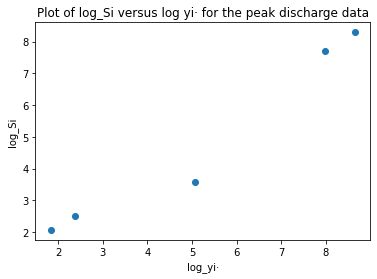

In [16]:
# 作图
plt.scatter(log_mean_list, log_std_list)
plt.title('Plot of log_Si versus log yi· for the peak discharge data')
plt.xlabel('log_yi·')
plt.ylabel('log_Si')

下面则有两个不同的思路，一个思路是将 $\lambda$的真实拟合出的1-0.92代入，二则是直接取$alpha$=1,则$\lambda$为0

## 幂变换：Case1:$alpha=0.92=slope$

In [17]:
labda=1-slope#slope=alpha
labda_group_list=[]
for group in group_list:
    labda_group=group**labda
    labda_group_list.append(labda_group)

labda_groups_powerDf = pd.DataFrame(labda_group_list)
labda_groups_powerDf.head()

,0,1,2,3
0,1.449070,1.490328,1.515423,1.505165
1,1.000000,1.056221,1.115602,1.256190
2,1.707472,1.756087,1.966676,1.937127
3,1.631682,2.011953,1.967585,2.069270
4,1.165972,1.135421,1.304368,1.056221


In [18]:
groupsDf=pd.DataFrame(group_list)
groupsDf.head()

,0,1,2,3
0,110,157,194,178
1,1,2,4,18
2,880,1256,5276,4355
3,495,7040,5307,10050
4,7,5,29,2


In [19]:
# 计算变换后峰值流量的残差
df = np.array(labda_group_list)
labda_data = [data[:,0], df.reshape(1, 20).tolist()[0]]
labda_data = np.array(labda_data * 1).T
labda_data_res = labda_data * 1
for k in range(a):
    labda_cnt = labda_data_res[labda_data_res[:,0] == k + 1,1]
    labda_data_res[labda_data_res[:,0] == k + 1,1] = labda_cnt - np.mean(labda_cnt)


Text(0, 0.5, 'e_ij*')

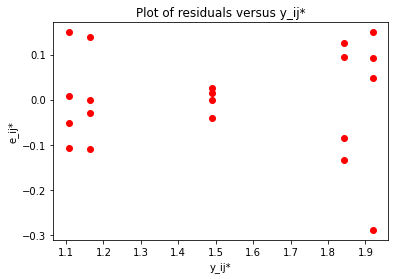

In [20]:

# 变换后的残差与拟合值的关系图
labda_res = labda_data_res[:,1]
labda_y = []
for i in range(a):
    for j in range(n):
        labda_y.append(np.mean(labda_data[(labda_data[:,0] == i + 1),1]))
plt.scatter(labda_y, labda_res, c = "red")
plt.title('Plot of residuals versus y_ij*')
plt.xlabel('y_ij*')
plt.ylabel('e_ij*')

使用变换后的数据的Levene方差齐性检验

In [21]:
# 开根号后，再用Levene检验进行方差齐性检验
power_lene, pVal4 = stats.levene( labda_group_list[0],  labda_group_list[1],  labda_group_list[2],  labda_group_list[3], labda_group_list[4])
if pVal4 < alpha:
    print('Since p-value < 0.05, reject H0.\n')
else:
    print('Accept 原假设，幂变换后的数据满足方差齐性\n')  

Accept 原假设，幂变换后的数据满足方差齐性



## 幂变换：Case2:$alpha=1$,$\lambda=0$

In [22]:
labda=0#slope=alpha
labda_group_list=[]
for group in group_list:
    labda_group=group**labda
    labda_group_list.append(labda_group)

labda_groups_powerDf = pd.DataFrame(labda_group_list)
labda_groups_powerDf.head()


,0,1,2,3
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


In [23]:
# 数据复原
labda=1-slope#slope=alpha
labda_group_list=[]
for group in group_list:
    labda_group=group**labda
    labda_group_list.append(labda_group)

In [24]:
labda_group_list

[array([1.44907021, 1.49032783, 1.51542324, 1.50516494]),
 array([1.        , 1.05622086, 1.1156025 , 1.25619043]),
 array([1.70747221, 1.756087  , 1.96667583, 1.9371272 ]),
 array([1.63168165, 2.01195314, 1.96758524, 2.06926953]),
 array([1.16597163, 1.13542067, 1.3043678 , 1.05622086])]

可以由上面看出，直接粗暴地取$\alpha=1$会导致在幂变换中所有数都变为1的问题，（非0指数为0，则值为1）

## 对数据做Box-Cox变换以满足方差齐性

In [25]:
data[:,1]

array([  110,   157,   194,   178,     1,     2,     4,    18,   880,
        1256,  5276,  4355,   495,  7040,  5307, 10050,     7,     5,
          29,     2])

lmax_mle:  0.016756747738272192
lmax_pearsonr:  0.014405187672448234


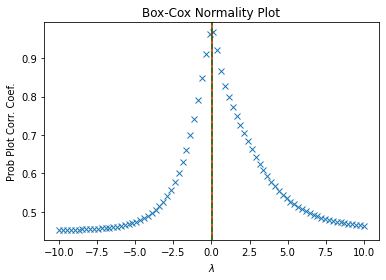

Text(0, 0.5, 'e_ij*')

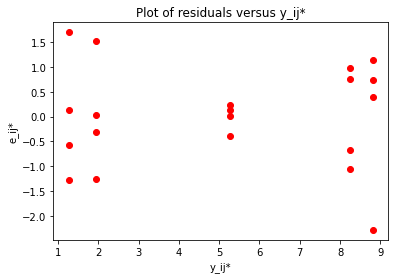

In [26]:
 #作Box-Cox变换
 #输入: 1-d array
 #输出：最大化对数似然函数的lambda
bc, lmax_mle = stats.boxcox(data[:,1])#
lmax_pearsonr = stats.boxcox_normmax(data[:,1])
print('lmax_mle: ', lmax_mle)
print('lmax_pearsonr: ', lmax_pearsonr)

fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(data[:,1], -10, 10, plot = ax)
ax.axvline(lmax_mle, color='r')
ax.axvline(lmax_pearsonr, color='g', ls='--')
plt.show()

# 计算变换后峰值流量的残差，基本原理同上
bc_group1 = bc[0:4]
bc_group2 = bc[4:8]
bc_group3 = bc[8:12]
bc_group4 = bc[12:16]
bc_group5 = bc[16:20]
bc_groups = [bc_group1, bc_group2, bc_group3, bc_group4,bc_group5]
bc_groups1 = pd.DataFrame(bc_groups)

df = np.array(bc_groups)
bc_data = [data[:,0], df.reshape(1, 20).tolist()[0]]
bc_data = np.array(bc_data * 1).T
bc_data_res = bc_data * 1
for k in range(a):
    bc_cnt = bc_data_res[bc_data_res[:,0] == k + 1,1]
    bc_data_res[bc_data_res[:,0] == k + 1,1] = bc_cnt - np.mean(bc_cnt)

# Box-Cox变换后的残差与拟合值的关系图
bc_res = bc_data_res[:,1]
bc_y = []
for i in range(a):
    for j in range(n):
        bc_y.append(np.mean(bc_data[(bc_data[:,0] == i + 1),1]))
plt.scatter(bc_y, bc_res, c = "red")
plt.title('Plot of residuals versus y_ij*')
plt.xlabel('y_ij*')
plt.ylabel('e_ij*')


In [27]:
# Box-Cox变换后，再用Levene检验进行方差齐性检验 
bc_lene, pVal5 = stats.levene(bc_group1, bc_group2, bc_group3, bc_group4,bc_group5)
if pVal5 < alpha:
    print('Since p-value < 0.05, reject H0.\n')
else:
    print('Box-Cox变换后，再用Levene检验进行方差齐性检验 ,满足方差齐性') 

Box-Cox变换后，再用Levene检验进行方差齐性检验 ,满足方差齐性


## 问题4:如果需要变换，基于变换后的数据，试判断 5 种绝缘材料的性能是否存在差异.
### 基于幂变换的One-way ANOVA 检验
幂变换的ANOVA TABLE 

In [28]:
data_labda=labda_group_list
Material=[]
FailureT=[]
for i in range(a):
    for data in labda_group_list[i]:
        FailureT.append(data)
        Material.append(i)
c={"Material" : Material,
   "FailureT" : FailureT}
df=pd.DataFrame(c)#将字典转换成为数据框
df.head()

,Material,FailureT
0,0,1.449070
1,0,1.490328
2,0,1.515423
3,0,1.505165
4,1,1.000000


In [29]:
model = ols('FailureT ~ C(Material)', df).fit()#!!!注意这个ols的名字方式，之前一直错在这里

In [30]:
anovaResults = anova_lm(model)
print(anovaResults)

               df    sum_sq   mean_sq         F        PR(>F)
C(Material)   4.0  2.238712  0.559678  35.38643  1.786204e-07
Residual     15.0  0.237243  0.015816       NaN           NaN


In [31]:

power_F0, pVal6 = stats.f_oneway(labda_group_list[0],labda_group_list[1],labda_group_list[2],labda_group_list[3],labda_group_list[4])
if pVal6 < alpha:
    print('Since p-value < 0.05, reject H0.由One-way ANOVA，幂变换后可得各组（因子）之间是有差异\n')
else:
    print('Accept H0\n') 


Since p-value < 0.05, reject H0.由One-way ANOVA，幂变换后可得各组（因子）之间是有差异



In [32]:
bc_group_list=[bc_group1, bc_group2, bc_group3, bc_group4,bc_group5]
data_bc=bc_group_list
Material_bc=[]
FailureT_bc=[]
for i in range(a):
    for data in bc_group_list[i]:
        FailureT_bc.append(data)
        Material_bc.append(i)
c={"Material" :Material_bc ,
   "FailureT" :FailureT_bc}
df=pd.DataFrame(c)#将字典转换成为数据框
df.head()

,Material,FailureT
0,0,4.890554
1,0,5.276624
2,0,5.507356
3,0,5.413405
4,1,0.000000


In [33]:
model = ols('FailureT ~ C(Material)', df).fit()
anovaResults = anova_lm(model)
print(anovaResults)

               df      sum_sq    mean_sq          F        PR(>F)
C(Material)   4.0  193.668327  48.417082  37.624897  1.182844e-07
Residual     15.0   19.302544   1.286836        NaN           NaN


In [34]:
# Box-Cox变换后，Do the one-way ANOVA with transformation of square root
bc_F0, pVal7 = stats.f_oneway(bc_group1, bc_group2, bc_group3, bc_group4,bc_group5)
if pVal7 < alpha:
    print('Since p-value < 0.05, reject H0.由One-way ANOVA,BOX_COX变换后可得各组（因子）之间有差异\n')
else:
    print('Accept H0\n') 

Since p-value < 0.05, reject H0.由One-way ANOVA,BOX_COX变换后可得各组（因子）之间有差异

